In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm import tqdm

In [494]:
krgas = pd.read_csv('한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')

In [495]:
krgas

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [496]:
krgas.dtypes

연월일     object
시간       int64
구분      object
공급량    float64
dtype: object

In [497]:
krgas.describe()

,시간,공급량
count,368088.000000,368088.000000
mean,12.500000,948.100037
std,6.922196,927.211578
min,1.000000,1.378000
25%,6.750000,221.973000
50%,12.500000,637.014000
75%,18.250000,1398.919000
max,24.000000,11593.617000


In [498]:
#혐우 기상청 데이터 가져와서 해보기
w2013 = pd.read_csv('2013기상청.csv')
w2014 = pd.read_csv('2014기상청.csv')
w2015 = pd.read_csv('2015기상청.csv')
w2016 = pd.read_csv('2016기상청.csv')
w2017 = pd.read_csv('2017기상청.csv')
w2018 = pd.read_csv('2018기상청.csv')


In [499]:
import datetime

In [500]:
#변수 명 krgas 변수명으로 변경
w2013['시간'] = pd.DatetimeIndex(w2013['일시']).hour
w2013['연월일'] = pd.DatetimeIndex(w2013['일시']).date

w2014['시간'] = pd.DatetimeIndex(w2014['일시']).hour
w2014['연월일'] = pd.DatetimeIndex(w2014['일시']).date

w2015['시간'] = pd.DatetimeIndex(w2015['일시']).hour
w2015['연월일'] = pd.DatetimeIndex(w2015['일시']).date

w2016['시간'] = pd.DatetimeIndex(w2016['일시']).hour
w2016['연월일'] = pd.DatetimeIndex(w2016['일시']).date

w2017['시간'] = pd.DatetimeIndex(w2017['일시']).hour
w2017['연월일'] = pd.DatetimeIndex(w2017['일시']).date

w2018['시간'] = pd.DatetimeIndex(w2018['일시']).hour
w2018['연월일'] = pd.DatetimeIndex(w2018['일시']).date

In [501]:
#필요없다 생각한거 다 dorp하기
w2013 = w2013.drop(columns = ['지점', '일시', 
                             '전운량(10분위)', '지면상태(지면상태코드)', 
                              '현상번호(국내식)', ])


w2014 = w2014.drop(columns = ['지점', '일시', 
                             '전운량(10분위)', '지면상태(지면상태코드)', 
                              '현상번호(국내식)',])

w2015 = w2015.drop(columns = ['지점', '일시', 
                             '전운량(10분위)', '지면상태(지면상태코드)', 
                              '현상번호(국내식)',])

w2016 = w2016.drop(columns = ['지점', '일시', 
                             '전운량(10분위)', '지면상태(지면상태코드)', 
                              '현상번호(국내식)' ])

w2017 = w2017.drop(columns = ['지점', '일시',
                             '전운량(10분위)', '지면상태(지면상태코드)', 
                              '현상번호(국내식)'])

w2018 = w2018.drop(columns = ['지점', '일시',
                             '전운량(10분위)', '지면상태(지면상태코드)', 
                              '현상번호(국내식)',])

In [502]:
w2017

,지점명,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),적설(cm),지면온도(°C),시간,연월일
0,서울,0.0,NaN,1.4,78.0,1018.9,NaN,NaN,-0.9,1,2017-01-01
1,서울,-0.3,NaN,1.9,81.0,1018.5,NaN,NaN,-1.8,2,2017-01-01
2,서울,-0.7,NaN,2.0,84.0,1018.8,NaN,NaN,-2.1,3,2017-01-01
3,서울,-1.1,NaN,1.6,85.0,1018.6,NaN,NaN,-2.4,4,2017-01-01
4,서울,-1.4,NaN,1.4,86.0,1018.3,NaN,NaN,-2.6,5,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...
8755,서울,-1.0,NaN,0.9,32.0,1014.1,NaN,NaN,-0.9,20,2017-12-31
8756,서울,-1.6,NaN,1.0,35.0,1014.3,NaN,NaN,-1.1,21,2017-12-31
8757,서울,-2.1,NaN,1.7,36.0,1014.7,NaN,NaN,-1.4,22,2017-12-31
8758,서울,-2.6,NaN,0.6,40.0,1015.1,NaN,NaN,-1.9,23,2017-12-31


In [503]:
#컬렴 명 위치 바꾸기
w2013 = w2013.reindex(columns = ['연월일', '시간', '지점명', '기온(°C)',
                                '강수량(mm)', '풍속(m/s)', '습도(%)',
                                '현지기압(hPa)','일조(hr)','지면온도(°C)', '적설(cm)'])

w2014 = w2014.reindex(columns = ['연월일', '시간', '지점명', '기온(°C)',
                                '강수량(mm)', '풍속(m/s)', '습도(%)',
                                '현지기압(hPa)','일조(hr)','지면온도(°C)','적설(cm)'])

w2015 = w2015.reindex(columns = ['연월일', '시간', '지점명', '기온(°C)',
                                '강수량(mm)', '풍속(m/s)', '습도(%)',
                                '현지기압(hPa)','일조(hr)','지면온도(°C)','적설(cm)'])

w2016 = w2016.reindex(columns = ['연월일', '시간', '지점명', '기온(°C)',
                                '강수량(mm)', '풍속(m/s)', '습도(%)',
                                '현지기압(hPa)','일조(hr)','지면온도(°C)','적설(cm)'])

w2017 = w2017.reindex(columns = ['연월일', '시간', '지점명', '기온(°C)',
                                '강수량(mm)', '풍속(m/s)', '습도(%)',
                                '현지기압(hPa)','일조(hr)','지면온도(°C)','적설(cm)'])

w2018 = w2018.reindex(columns = ['연월일', '시간', '지점명', '기온(°C)',
                                '강수량(mm)', '풍속(m/s)', '습도(%)',
                                '현지기압(hPa)','일조(hr)','지면온도(°C)','적설(cm)'])

In [504]:
# krgas 데이터와 w20.. 데이터간 시간이 다르게 적용되는 부분 같아지게 해주는 작업
w2013.loc[w2013.시간 == 0, '시간'] = 24
w2014.loc[w2014.시간 == 0, '시간'] = 24
w2015.loc[w2015.시간 == 0, '시간'] = 24
w2016.loc[w2016.시간 == 0, '시간'] = 24
w2017.loc[w2017.시간 == 0, '시간'] = 24
w2018.loc[w2018.시간 == 0, '시간'] = 24

In [505]:
w2013.loc[w2013.시간 == 24, '연월일'] = w2013['연월일'] - datetime.timedelta(days = 1)
w2014.loc[w2014.시간 == 24, '연월일'] = w2014['연월일'] - datetime.timedelta(days = 1)
w2015.loc[w2015.시간 == 24, '연월일'] = w2015['연월일'] - datetime.timedelta(days = 1)
w2016.loc[w2016.시간 == 24, '연월일'] = w2016['연월일'] - datetime.timedelta(days = 1)
w2017.loc[w2017.시간 == 24, '연월일'] = w2017['연월일'] - datetime.timedelta(days = 1)
w2018.loc[w2018.시간 == 24, '연월일'] = w2018['연월일'] - datetime.timedelta(days = 1)


In [506]:
wa = [w2013, w2014, w2015, w2016, w2017, w2018]
wa

[             연월일  시간 지점명  기온(°C)  강수량(mm)  풍속(m/s)  습도(%)  현지기압(hPa)  일조(hr)  \
 0     2013-01-01   1  서울    -8.5      NaN      4.0   57.0     1010.0     NaN   
 1     2013-01-01   2  서울    -8.4      NaN      4.0   60.0     1009.4     NaN   
 2     2013-01-01   3  서울    -8.1      NaN      3.4   58.0     1009.2     NaN   
 3     2013-01-01   4  서울    -8.2      NaN      3.8   58.0     1008.2     NaN   
 4     2013-01-01   5  서울    -8.2      NaN      4.4   61.0     1007.3     NaN   
 ...          ...  ..  ..     ...      ...      ...    ...        ...     ...   
 8755  2013-12-31  20  서울     5.2      NaN      2.7   70.0      999.0     NaN   
 8756  2013-12-31  21  서울     4.9      NaN      3.9   64.0      999.6     NaN   
 8757  2013-12-31  22  서울     4.2      NaN      3.6   62.0     1000.4     NaN   
 8758  2013-12-31  23  서울     3.7      NaN      3.2   61.0     1001.2     NaN   
 8759  2013-12-31  24  서울     3.3      NaN      3.8   65.0     1001.9     NaN   
 
       지면온도(°C)  적설(cm)  


In [507]:
ww = pd.concat(wa, ignore_index = False)

In [508]:
ww

,연월일,시간,지점명,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),지면온도(°C),적설(cm)
0,2013-01-01,1,서울,-8.5,NaN,4.0,57.0,1010.0,NaN,-3.4,6.4
1,2013-01-01,2,서울,-8.4,NaN,4.0,60.0,1009.4,NaN,-3.4,6.4
2,2013-01-01,3,서울,-8.1,NaN,3.4,58.0,1009.2,NaN,-3.4,6.4
3,2013-01-01,4,서울,-8.2,NaN,3.8,58.0,1008.2,NaN,-3.4,6.4
4,2013-01-01,5,서울,-8.2,NaN,4.4,61.0,1007.3,NaN,-3.3,6.4
...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,서울,-3.7,NaN,0.8,39.0,1024.9,NaN,-3.0,NaN
8756,2018-12-31,21,서울,-4.6,NaN,1.1,44.0,1024.8,NaN,-4.1,NaN
8757,2018-12-31,22,서울,-5.4,NaN,1.3,46.0,1024.4,NaN,-5.0,NaN
8758,2018-12-31,23,서울,-5.2,NaN,1.6,47.0,1024.6,NaN,-5.1,NaN


In [509]:
ww = ww.drop(['지점명'], axis = 1)

In [510]:
ww.fillna(0, inplace=True)

In [511]:
ww

,연월일,시간,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),지면온도(°C),적설(cm)
0,2013-01-01,1,-8.5,0.0,4.0,57.0,1010.0,0.0,-3.4,6.4
1,2013-01-01,2,-8.4,0.0,4.0,60.0,1009.4,0.0,-3.4,6.4
2,2013-01-01,3,-8.1,0.0,3.4,58.0,1009.2,0.0,-3.4,6.4
3,2013-01-01,4,-8.2,0.0,3.8,58.0,1008.2,0.0,-3.4,6.4
4,2013-01-01,5,-8.2,0.0,4.4,61.0,1007.3,0.0,-3.3,6.4
...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31,20,-3.7,0.0,0.8,39.0,1024.9,0.0,-3.0,0.0
8756,2018-12-31,21,-4.6,0.0,1.1,44.0,1024.8,0.0,-4.1,0.0
8757,2018-12-31,22,-5.4,0.0,1.3,46.0,1024.4,0.0,-5.0,0.0
8758,2018-12-31,23,-5.2,0.0,1.6,47.0,1024.6,0.0,-5.1,0.0


In [512]:
krgas

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [513]:
krgas['시간'].dtypes

dtype('int64')

In [514]:
krgas['연월일'] = krgas['연월일'].astype('str')
ww['연월일'] = ww['연월일'].astype('str')

In [515]:
krgas1 = pd.merge(krgas, ww, on = ['연월일', '시간'],   how = 'left')

In [516]:
krgas1

,연월일,시간,구분,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),지면온도(°C),적설(cm)
0,2013-01-01,1,A,2497.129,-8.5,0.0,4.0,57.0,1010.0,0.0,-3.4,6.4
1,2013-01-01,2,A,2363.265,-8.4,0.0,4.0,60.0,1009.4,0.0,-3.4,6.4
2,2013-01-01,3,A,2258.505,-8.1,0.0,3.4,58.0,1009.2,0.0,-3.4,6.4
3,2013-01-01,4,A,2243.969,-8.2,0.0,3.8,58.0,1008.2,0.0,-3.4,6.4
4,2013-01-01,5,A,2344.105,-8.2,0.0,4.4,61.0,1007.3,0.0,-3.3,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,H,681.033,-3.7,0.0,0.8,39.0,1024.9,0.0,-3.0,0.0
368084,2018-12-31,21,H,669.961,-4.6,0.0,1.1,44.0,1024.8,0.0,-4.1,0.0
368085,2018-12-31,22,H,657.941,-5.4,0.0,1.3,46.0,1024.4,0.0,-5.0,0.0
368086,2018-12-31,23,H,610.953,-5.2,0.0,1.6,47.0,1024.6,0.0,-5.1,0.0


In [517]:
#타입 확인하기
krgas1.dtypes

연월일           object
시간             int64
구분            object
공급량          float64
기온(°C)       float64
강수량(mm)      float64
풍속(m/s)      float64
습도(%)        float64
현지기압(hPa)    float64
일조(hr)       float64
지면온도(°C)     float64
적설(cm)       float64
dtype: object

In [518]:
test = pd.read_csv("test.csv")

In [519]:
test.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [520]:
test.dtypes #일자 시간 구분이 다 합쳐져 있네? ㅁㅊ

일자|시간|구분    object
dtype: object

In [521]:
test['연월일'] = pd.to_datetime(test['일자|시간|구분'], format = '%Y-%m-%d', errors='raise')

ValueError: time data 2019-01-01 01 A doesn't match format specified

In [522]:
# 위 방법은 에러뜨네?

In [472]:
test['연월일'] = 0
test['시간'] = 0
test['구분'] = 0
test['월일'] = 0
for i in tqdm(range(len(test))):
    test['연월일'][i] = test['일자|시간|구분'][i][:10]
    test['시간'][i] = test['일자|시간|구분'][i][11:13]
    test['구분'][i] = test['일자|시간|구분'][i][-1:]

for i in tqdm(range(len(test))):
    test['월일'][i] = test['연월일'][i][5:10]
test = test.drop(columns = '일자|시간|구분')

  0%|                                                                                        | 0/15120 [00:00<?, ?it/s]C:\Users\ghkdw\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ghkdw\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\ghkdw\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [473]:
test #tset 데이터셋 train 데이터셋과 같은 형식 만듬,

,연월일,시간,구분,월일
0,2019-01-01,1,A,01-01
1,2019-01-01,2,A,01-01
2,2019-01-01,3,A,01-01
3,2019-01-01,4,A,01-01
4,2019-01-01,5,A,01-01
...,...,...,...,...
15115,2019-03-31,20,H,03-31
15116,2019-03-31,21,H,03-31
15117,2019-03-31,22,H,03-31
15118,2019-03-31,23,H,03-31


In [178]:
test.dtypes #type도 확인

연월일    object
시간      int64
구분     object
월일     object
dtype: object

In [379]:
#krgas1 데이터 분석을 위해 우선 한글 폰트 설정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Hancom Gothic Regular.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\ghkdw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghkdw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

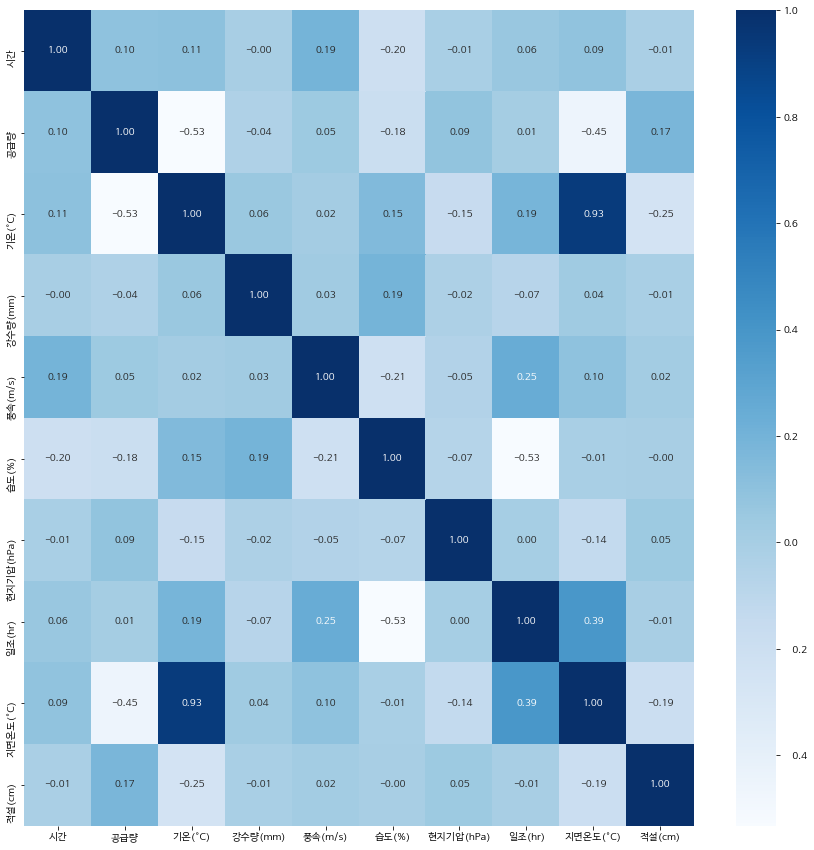

In [380]:
# 상관계수 히트맵 그려보기
plt.figure(figsize=(15,15))
sns.heatmap(data = krgas1.corr(), annot=True, 
fmt = '.2f', cmap='Blues')

In [381]:
krgas1.dtypes

연월일           object
시간             int64
구분            object
공급량          float64
기온(°C)       float64
강수량(mm)      float64
풍속(m/s)      float64
습도(%)        float64
현지기압(hPa)    float64
일조(hr)       float64
지면온도(°C)     float64
적설(cm)       float64
dtype: object

AttributeError: 'list' object has no attribute 'plt'

C:\Users\ghkdw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ghkdw\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


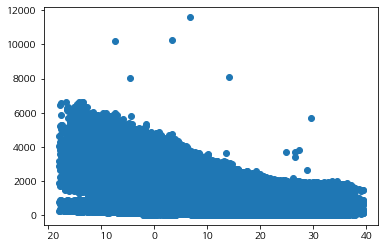

In [382]:
from sklearn.linear_model import LinearRegression
x = krgas1['기온(°C)']
y = krgas1['공급량']
plt.plot(x, y, 'o').plt.show

# 다중회귀 해보기

In [523]:
#연월일 타입 변경시켜주기
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
krgas1['구분'] = label_encoder.fit_transform(krgas1['구분'])
krgas1['연월일'] = label_encoder.fit_transform(krgas1['연월일'])

In [524]:
krgas1.dtypes

연월일            int32
시간             int64
구분             int32
공급량          float64
기온(°C)       float64
강수량(mm)      float64
풍속(m/s)      float64
습도(%)        float64
현지기압(hPa)    float64
일조(hr)       float64
지면온도(°C)     float64
적설(cm)       float64
dtype: object

In [525]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
x = krgas1.drop(['공급량'], axis = 1)
y = krgas1['공급량']

In [526]:
#검정
multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    공급량   R-squared (uncentered):                   0.671
Model:                            OLS   Adj. R-squared (uncentered):              0.670
Method:                 Least Squares   F-statistic:                          6.809e+04
Date:                Tue, 16 Nov 2021   Prob (F-statistic):                        0.00
Time:                        15:56:51   Log-Likelihood:                     -2.9645e+06
No. Observations:              368088   AIC:                                  5.929e+06
Df Residuals:                  368077   BIC:                                  5.929e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연월일            0.0231      0.002     10.953      0.000       0.019       0.027
시간            21.1906      0.192    110.434      0.000      20.815      21.567
구분            27.1009      0.627     43.250      0.000      25.873      28.329
기온(°C)       -59.7528      0.369   -161.916      0.000     -60.476     -59.030
강수량(mm)        1.3132      1.177      1.116      0.265      -0.994       3.620
풍속(m/s)       -0.2474      1.016     -0.243      0.808      -2.240       1.745
습도(%)          0.0048      0.081      0.059      0.953      -0.154       0.164
현지기압(hPa)      1.1145      0.007    153.659      0.000       1.100       1.129
일조(hr)       132.5460      4.282     30.956      0.000     124.154     140.938
지면온도(°C)      13.5527      0.322     42.072      0.000      12.921      14.184
적설(cm)        31.2582      1.213     25.770      0.000      28.881      33.636
==============================================================================
Omnibus:                    23423.994   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36751.346
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                     5.35e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [527]:
# 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [528]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
7,33.787901,현지기압(hPa)
9,26.352227,지면온도(°C)
3,26.058725,기온(°C)
6,16.443339,습도(%)
5,4.947985,풍속(m/s)
1,4.775050,시간
0,4.508361,연월일
2,3.242321,구분
8,2.993166,일조(hr)
10,1.148310,적설(cm)


In [529]:
# 기압 지면온도 기온 습도가 vif계수가 10이 넘어가는걸 볼 수가 있다.
# 그러나 위 변수들은 공급량에 영향을 많이주는 변수라 판단이 됨으로 제거하지 않고
# 다른방법을 이용

In [530]:
# 정규화나 PCA가 있으나 정규화 연습을 위해  정규화로 하기로함(빅분기 실기해야댐)

In [531]:
#train데이터와 test 데이터 합치기(평균으로)
#krgas1 라벨 인코딩한거 원래대로 해주기
krgas1['구분'] = label_encoder.inverse_transform(krgas1['구분'])
krgas1['연월일'] = label_encoder.inverse_transform(krgas1['연월일']) 

In [532]:
krgas1 #이거왜 '연월일' 데이터가 '구분'에 나오는지 이해가 안댐

,연월일,시간,구분,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),지면온도(°C),적설(cm)
0,2013-01-01,1,2013-01-01,2497.129,-8.5,0.0,4.0,57.0,1010.0,0.0,-3.4,6.4
1,2013-01-01,2,2013-01-01,2363.265,-8.4,0.0,4.0,60.0,1009.4,0.0,-3.4,6.4
2,2013-01-01,3,2013-01-01,2258.505,-8.1,0.0,3.4,58.0,1009.2,0.0,-3.4,6.4
3,2013-01-01,4,2013-01-01,2243.969,-8.2,0.0,3.8,58.0,1008.2,0.0,-3.4,6.4
4,2013-01-01,5,2013-01-01,2344.105,-8.2,0.0,4.4,61.0,1007.3,0.0,-3.3,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,2013-01-07,681.033,-3.7,0.0,0.8,39.0,1024.9,0.0,-3.0,0.0
368084,2018-12-31,21,2013-01-07,669.961,-4.6,0.0,1.1,44.0,1024.8,0.0,-4.1,0.0
368085,2018-12-31,22,2013-01-07,657.941,-5.4,0.0,1.3,46.0,1024.4,0.0,-5.0,0.0
368086,2018-12-31,23,2013-01-07,610.953,-5.2,0.0,1.6,47.0,1024.6,0.0,-5.1,0.0


In [533]:
krgas1['월일'] = krgas1['연월일'].apply(lambda x: x[5:10])

In [534]:
krgas1.head()

,연월일,시간,구분,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),지면온도(°C),적설(cm),월일
0,2013-01-01,1,2013-01-01,2497.129,-8.5,0.0,4.0,57.0,1010.0,0.0,-3.4,6.4,01-01
1,2013-01-01,2,2013-01-01,2363.265,-8.4,0.0,4.0,60.0,1009.4,0.0,-3.4,6.4,01-01
2,2013-01-01,3,2013-01-01,2258.505,-8.1,0.0,3.4,58.0,1009.2,0.0,-3.4,6.4,01-01
3,2013-01-01,4,2013-01-01,2243.969,-8.2,0.0,3.8,58.0,1008.2,0.0,-3.4,6.4,01-01
4,2013-01-01,5,2013-01-01,2344.105,-8.2,0.0,4.4,61.0,1007.3,0.0,-3.3,6.4,01-01


In [535]:
krgas2 = krgas1.groupby([ '월일', '시간']).mean()
krgas2 = krgas2.reset_index()
krgas2

,월일,시간,공급량,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),지면온도(°C),적설(cm)
0,01-01,1,1561.196524,-3.116667,0.0,2.450000,59.666667,1013.333333,0.0,-2.083333,1.066667
1,01-01,2,1459.118548,-3.483333,0.0,2.233333,61.833333,1013.233333,0.0,-2.433333,1.066667
2,01-01,3,1363.019048,-3.716667,0.0,2.233333,62.166667,1013.333333,0.0,-2.650000,1.066667
3,01-01,4,1352.706214,-4.050000,0.0,2.683333,63.333333,1013.183333,0.0,-2.883333,1.066667
4,01-01,5,1428.945429,-4.283333,0.0,2.716667,64.000000,1012.850000,0.0,-3.050000,1.066667
...,...,...,...,...,...,...,...,...,...,...,...
8779,12-31,20,1990.520286,-0.350000,0.0,2.050000,56.666667,1014.816667,0.0,-0.850000,0.000000
8780,12-31,21,1932.094571,-0.916667,0.0,2.116667,57.666667,1015.050000,0.0,-1.266667,0.000000
8781,12-31,22,1873.628833,-1.533333,0.0,2.783333,57.000000,1015.200000,0.0,-1.600000,0.000000
8782,12-31,23,1790.445619,-1.883333,0.0,2.450000,56.666667,1015.583333,0.0,-1.866667,0.000000


In [ ]:
#라벨링 되돌리는게 되면 train, test데이터 합치고 뭐라도 할거같은데 help me